# Netbox initial REST API tests

* Just playing with the Netbox REST API and GUI in this notebook for now as I go through some of the [NetBoxLabs YouTube](https://www.youtube.com/@NetBoxLabs) videos
* I am running the Docker version of Netbox locally; rough instructions below for Mac:
```
brew install --cask docker
brew install docker-compose

git clone -b release https://github.com/netbox-community/netbox-docker.git
cd netbox-docker

# On
docker compose up -d
# Off
docker compose down

# Check Status:
docker ps
```

* Would like to try the `nornir_netbox` and `pynetbox` modules next


# Lab Setup with Netbox

* Creating a toy class to interact with Netbox below via API for learning and testing Netbox 101
* [NB device type libary](https://github.com/netbox-community/devicetype-library) can be used to import a ready made collection of device types into NetBox

## Topology
* Will be making heavy use of Logical-Systems
* Testing adding the devices to Netbox via API.
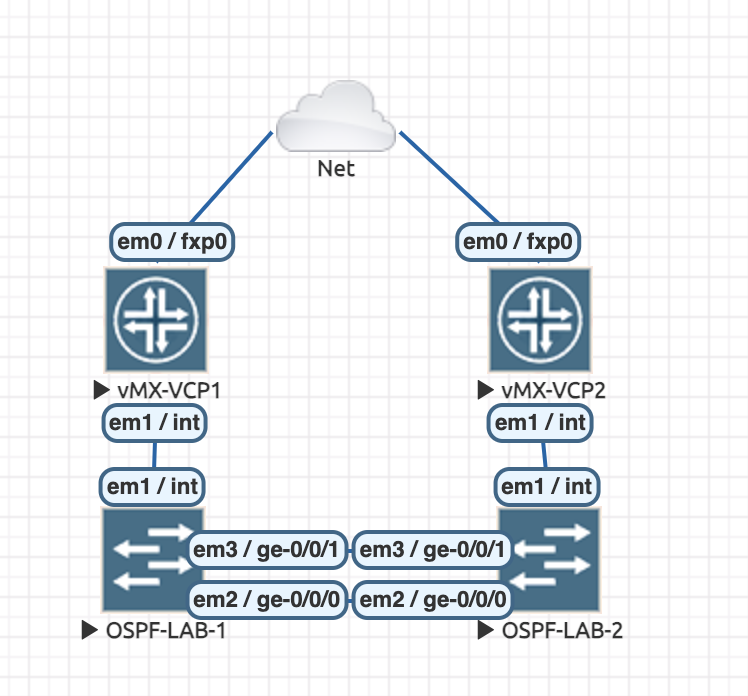 

In [83]:
import os
import requests

class NB():
    def __init__(self, API_TOKEN=os.getenv("NETBOX_API_TOKEN"), url="http://localhost:8000/api"):
        self._API_TOKEN = API_TOKEN
        self._NETBOX_URL = url

    class NetBoxAPIError(Exception):
        """Custom exception for NetBox API errors"""
        pass
        
    def netbox_get(self, endpoint):
        self._API_TOKEN = os.getenv("NETBOX_API_TOKEN")
        self._NETBOX_URL = "http://localhost:8000/api"
        headers = {
            "Authorization": f"Token {API_TOKEN}",
            "Content-Type": "application/json",
        }
        endpoint = f"{NETBOX_URL}/{endpoint}"
        response = requests.get(endpoint, headers=headers)
        if response.status_code == 200:
            response = response.json().get("results", [])
            return response
        else:
            raise NetBoxAPIError(f"Error: {response.status_code}")
            
    
    def netbox_post(self, endpoint, body):
        self._API_TOKEN = os.getenv("NETBOX_API_TOKEN")
        self._NETBOX_URL = "http://localhost:8000/api"
        headers = {
            "Authorization": f"Token {API_TOKEN}",
            "Content-Type": "application/json",
        }
        endpoint = f"{NETBOX_URL}/{endpoint}"
        response = requests.post(endpoint, headers=headers, json=body)
        if str(response.status_code).startswith("2"):
            response = response.json()
            return response
        else:
            raise NetBoxAPIError(f"Error: {response.status_code}\n{response.text}")
    

    def get_manufacturers(self):
            manufacturers = self.netbox_get("/dcim/manufacturers/") 
            for m in manufacturers:
                print(f"ID: {m['id']} - Name: {m['name']} - Slug: {m['slug']}")
            
    def get_devices(self):
            response = netbox_get("/dcim/devices/") 
            return response
    
    def post_devices(self, body):
            response = netbox_post("/dcim/devices/", body) 
            return response
        
    def put_devices(self, body):
            response = netbox_post("/dcim/devices/", body) 
            return response
        
    def get_device_roles(self):
            response = netbox_get("/dcim/device-roles/") 
            return response
    
    def post_device_roles(self, body):
            response = netbox_post("/dcim/device-roles/", body) 
            return response
        
    def get_device_types(self):
            response = netbox_get("/dcim/device-types/") 
            return response
        
    def get_platforms(self):
            response = netbox_get("/dcim/platforms/") 
            return response
            
    def get_sites(self):
            response = netbox_get("/dcim/sites/") 
            return response


In [84]:
nb = NB()

In [70]:
nb.get_manufacturers() 

ID: 2 - Name: Cisco - Slug: cisco
ID: 3 - Name: Fortinet - Slug: fortinet
ID: 1 - Name: Juniper - Slug: juniper


In [71]:
ospf_device_roles = {
    "name": "OSPF-LAB",
    "slug": "ospf-lab",
    "vm_role": False ,
}
#netbox_post_device_role(body=ospf_device_role)
nb.get_device_roles()

[{'id': 4,
  'url': 'http://localhost:8000/api/dcim/device-roles/4/',
  'display_url': 'http://localhost:8000/dcim/device-roles/4/',
  'display': 'OSPF-LAB',
  'name': 'OSPF-LAB',
  'slug': 'ospf-lab',
  'color': '9e9e9e',
  'vm_role': False,
  'config_template': None,
  'description': '',
  'tags': [],
  'custom_fields': {},
  'created': '2025-02-23T13:31:49.956865Z',
  'last_updated': '2025-02-23T13:31:49.956877Z',
  'device_count': 0,
  'virtualmachine_count': 0},
 {'id': 1,
  'url': 'http://localhost:8000/api/dcim/device-roles/1/',
  'display_url': 'http://localhost:8000/dcim/device-roles/1/',
  'display': 'general_lab',
  'name': 'general_lab',
  'slug': 'general_lab',
  'color': '9e9e9e',
  'vm_role': True,
  'config_template': None,
  'description': '',
  'tags': [],
  'custom_fields': {},
  'created': '2025-02-22T21:44:59.963592Z',
  'last_updated': '2025-02-22T21:44:59.963611Z',
  'device_count': 0,
  'virtualmachine_count': 0}]

In [59]:
nb.get_platforms()

[{'id': 2,
  'url': 'http://localhost:8000/api/dcim/platforms/2/',
  'display_url': 'http://localhost:8000/dcim/platforms/2/',
  'display': 'ios',
  'name': 'ios',
  'slug': 'ios',
  'manufacturer': {'id': 2,
   'url': 'http://localhost:8000/api/dcim/manufacturers/2/',
   'display': 'Cisco',
   'name': 'Cisco',
   'slug': 'cisco',
   'description': ''},
  'config_template': None,
  'description': '',
  'tags': [],
  'custom_fields': {},
  'created': '2025-02-22T21:43:07.058666Z',
  'last_updated': '2025-02-22T21:43:07.058686Z',
  'device_count': 0,
  'virtualmachine_count': 0},
 {'id': 1,
  'url': 'http://localhost:8000/api/dcim/platforms/1/',
  'display_url': 'http://localhost:8000/dcim/platforms/1/',
  'display': 'junos',
  'name': 'junos',
  'slug': 'junos',
  'manufacturer': {'id': 1,
   'url': 'http://localhost:8000/api/dcim/manufacturers/1/',
   'display': 'Juniper',
   'name': 'Juniper',
   'slug': 'juniper',
   'description': ''},
  'config_template': None,
  'description': '',

### Device-Type YAML data for vMX
* Adjusted one of the yaml files from the netbox community lab device-type folder to fit the lab
```
---
manufacturer: Juniper
model: vMX
slug: juniper-vMX
part_number: vMX
u_height: 1
front_image: true
rear_image: true
is_full_depth: false
comments: '[Juniper vMX Data Sheet](https://www.juniper.net/content/dam/www/assets/datasheets/us/en/routers/vmx-virtual-router-datasheet.pdf)'
interfaces:
  - name: fxp0
    type: 1000base-t
    mgmt_only: true
  - name: ge-0/0/0
    type: 1000base-t
  - name: ge-0/0/1
    type: 1000base-t
  - name: ge-0/0/2
    type: 1000base-t
  - name: ge-0/0/3
    type: 1000base-t
  - name: ge-0/0/4
    type: 1000base-t
  - name: ge-0/0/5
    type: 1000base-t
  - name: ge-0/0/6
    type: 1000base-t
  - name: ge-0/0/7
    type: 1000base-t
  - name: ge-0/0/8
    type: 1000base-t
  - name: ge-0/0/9
    type: 1000base-t
console-ports:
  - name: Console
    type: rj-45
```

In [72]:
nb.get_device_types()

[{'id': 2,
  'url': 'http://localhost:8000/api/dcim/device-types/2/',
  'display_url': 'http://localhost:8000/dcim/device-types/2/',
  'display': 'vMX',
  'manufacturer': {'id': 1,
   'url': 'http://localhost:8000/api/dcim/manufacturers/1/',
   'display': 'Juniper',
   'name': 'Juniper',
   'slug': 'juniper',
   'description': ''},
  'default_platform': None,
  'model': 'vMX',
  'slug': 'juniper-vMX',
  'part_number': 'vMX',
  'u_height': 1.0,
  'exclude_from_utilization': False,
  'is_full_depth': False,
  'subdevice_role': None,
  'airflow': None,
  'weight': None,
  'weight_unit': None,
  'front_image': None,
  'rear_image': None,
  'description': '',
  'comments': '[Juniper vMX Data Sheet](https://www.juniper.net/content/dam/www/assets/datasheets/us/en/routers/vmx-virtual-router-datasheet.pdf)',
  'tags': [],
  'custom_fields': {},
  'created': '2025-02-23T14:14:32.176631Z',
  'last_updated': '2025-02-23T14:14:32.176646Z',
  'device_count': 0,
  'console_port_template_count': 1,
  

In [78]:
ospf_lab_1_router = {
  "name": "JEJ-OSPF-LAB-1",
  "device_role": 4,
  "device_type": 2,
  "role": 4 ,
  "platform": 1,
  "site": 1,
  "status": "active",
}
nb.post_devices(body=ospf_lab_1_router)

{'id': 1,
 'url': 'http://localhost:8000/api/dcim/devices/1/',
 'display_url': 'http://localhost:8000/dcim/devices/1/',
 'display': 'JEJ-OSPF-LAB-1',
 'name': 'JEJ-OSPF-LAB-1',
 'device_type': {'id': 2,
  'url': 'http://localhost:8000/api/dcim/device-types/2/',
  'display': 'vMX',
  'manufacturer': {'id': 1,
   'url': 'http://localhost:8000/api/dcim/manufacturers/1/',
   'display': 'Juniper',
   'name': 'Juniper',
   'slug': 'juniper',
   'description': ''},
  'model': 'vMX',
  'slug': 'juniper-vMX',
  'description': ''},
 'role': {'id': 4,
  'url': 'http://localhost:8000/api/dcim/device-roles/4/',
  'display': 'OSPF-LAB',
  'name': 'OSPF-LAB',
  'slug': 'ospf-lab',
  'description': ''},
 'tenant': None,
 'platform': {'id': 1,
  'url': 'http://localhost:8000/api/dcim/platforms/1/',
  'display': 'junos',
  'name': 'junos',
  'slug': 'junos',
  'description': ''},
 'serial': '',
 'asset_tag': None,
 'site': {'id': 1,
  'url': 'http://localhost:8000/api/dcim/sites/1/',
  'display': 'Jejko

In [79]:
ospf_lab_2_router = {
  "name": "JEJ-OSPF-LAB-2",
  "device_role": 4,
  "device_type": 2,
  "role": 4 ,
  "platform": 1,
  "site": 1,
  "status": "active",
}
nb.post_devices(body=ospf_lab_2_router)

{'id': 2,
 'url': 'http://localhost:8000/api/dcim/devices/2/',
 'display_url': 'http://localhost:8000/dcim/devices/2/',
 'display': 'JEJ-OSPF-LAB-2',
 'name': 'JEJ-OSPF-LAB-2',
 'device_type': {'id': 2,
  'url': 'http://localhost:8000/api/dcim/device-types/2/',
  'display': 'vMX',
  'manufacturer': {'id': 1,
   'url': 'http://localhost:8000/api/dcim/manufacturers/1/',
   'display': 'Juniper',
   'name': 'Juniper',
   'slug': 'juniper',
   'description': ''},
  'model': 'vMX',
  'slug': 'juniper-vMX',
  'description': ''},
 'role': {'id': 4,
  'url': 'http://localhost:8000/api/dcim/device-roles/4/',
  'display': 'OSPF-LAB',
  'name': 'OSPF-LAB',
  'slug': 'ospf-lab',
  'description': ''},
 'tenant': None,
 'platform': {'id': 1,
  'url': 'http://localhost:8000/api/dcim/platforms/1/',
  'display': 'junos',
  'name': 'junos',
  'slug': 'junos',
  'description': ''},
 'serial': '',
 'asset_tag': None,
 'site': {'id': 1,
  'url': 'http://localhost:8000/api/dcim/sites/1/',
  'display': 'Jejko

In [67]:
nb.get_device()

[]

In [75]:
nb.get_sites()

[{'id': 1,
  'url': 'http://localhost:8000/api/dcim/sites/1/',
  'display_url': 'http://localhost:8000/dcim/sites/1/',
  'display': 'Jejkowice',
  'name': 'Jejkowice',
  'slug': 'jejkowice',
  'status': {'value': 'active', 'label': 'Active'},
  'region': {'id': 1,
   'url': 'http://localhost:8000/api/dcim/regions/1/',
   'display': 'Slask',
   'name': 'Slask',
   'slug': 'slask',
   'description': 'Where the air is so fresh and so clean',
   'site_count': 0,
   '_depth': 0},
  'group': None,
  'tenant': {'id': 1,
   'url': 'http://localhost:8000/api/tenancy/tenants/1/',
   'display': 'LAB-TEST',
   'name': 'LAB-TEST',
   'slug': 'lab-test',
   'description': 'First Netbox Tenant; test account for OSPF Lab'},
  'facility': '',
  'time_zone': 'Europe/Warsaw',
  'description': '',
  'physical_address': '',
  'shipping_address': '',
  'latitude': None,
  'longitude': None,
  'comments': '',
  'asns': [],
  'tags': [],
  'custom_fields': {},
  'created': '2025-02-22T21:40:25.632496Z',
  'la